Analyzing encrypted file: C:\Users\nagas\OneDrive\Desktop\eocs\encrypted_output.csv

=== Pattern Analysis ===
Total blocks: 332248
Unique blocks: 332248
Repeated blocks: 0
No repeated blocks detected.


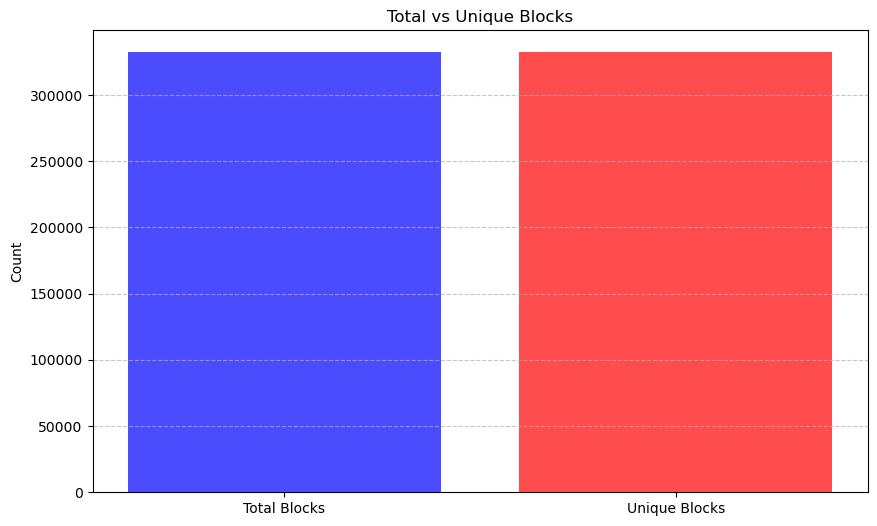


=== Length Leakage Check ===
Ciphertext length: 5315968
Ciphertext length aligns with block size.


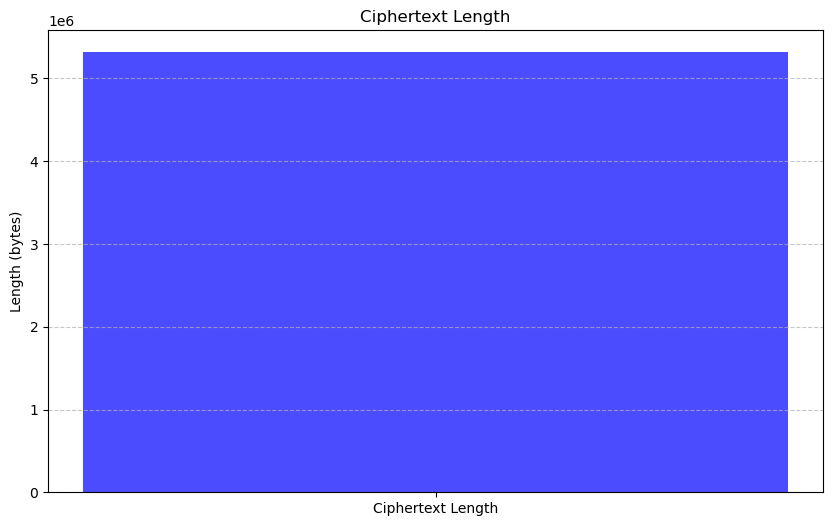


=== Entropy Test ===
Shannon Entropy: 8.0000 (Max: 8.0000)
Ciphertext appears random.


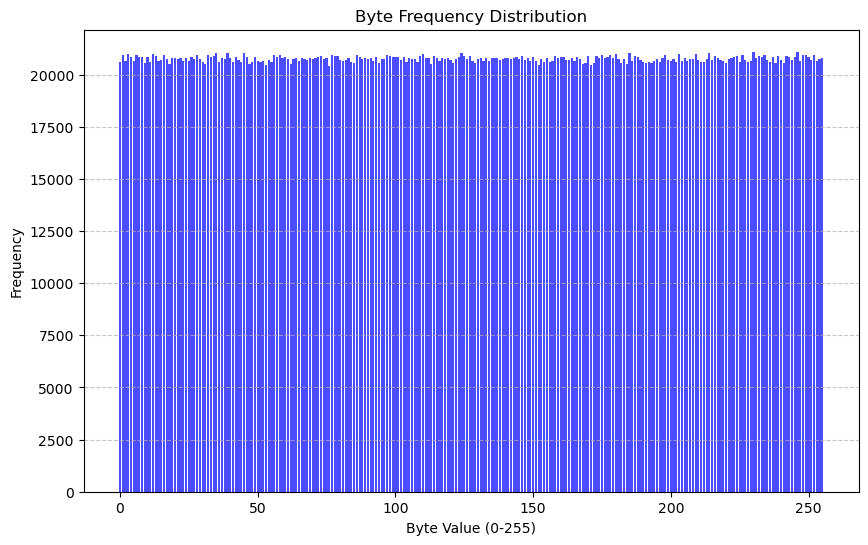


=== Chi-Square Test ===
Chi-Square Statistic: 214.1424, p-value: 0.9704
Ciphertext byte distribution appears uniform.


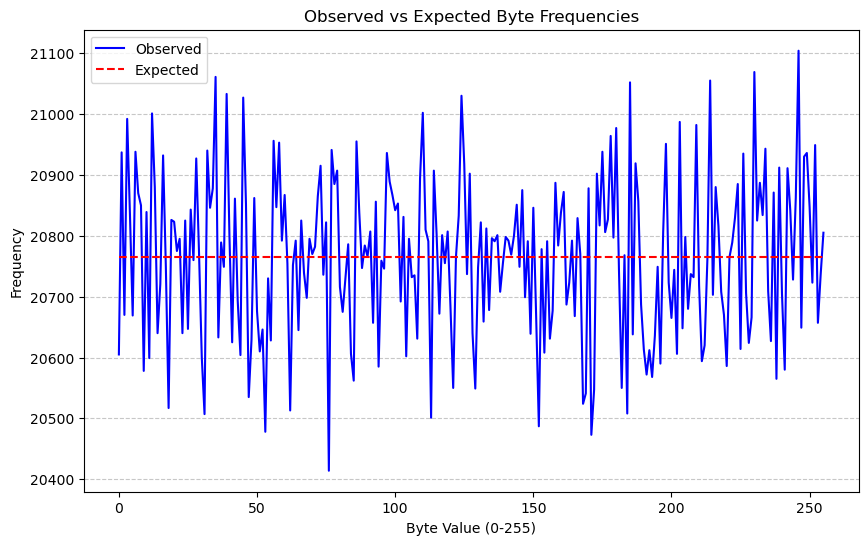

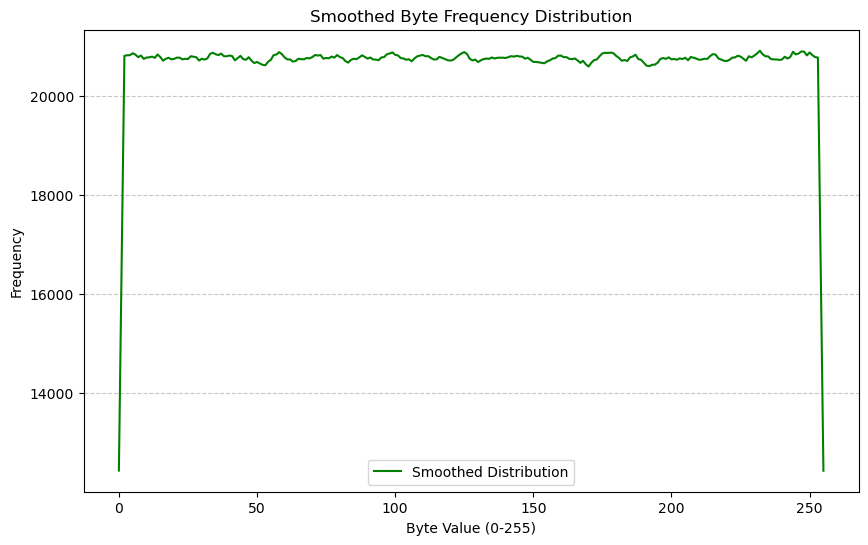


Character Mapping: {'H': 'K', 'E': 'H', 'L': 'O', 'O': 'R', ' ': ' ', 'W': 'Z', 'R': 'U', 'D': 'G'}
Decrypted Text: HELLO, WORLD! VHLIW WHEQ ERXWDL.


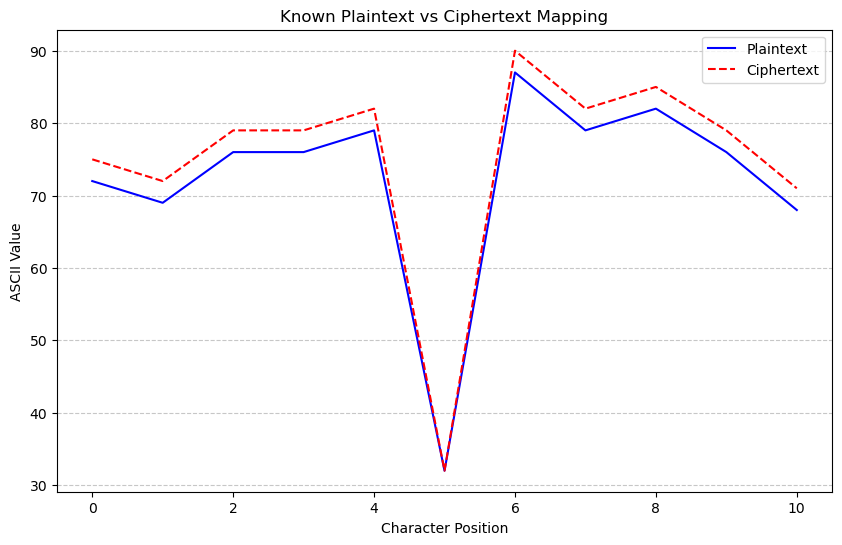

In [ ]:
import os
import math
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Function to create mapping from plaintext to ciphertext
def create_mapping(plaintext, ciphertext):
    mapping = {}
    for p_char, c_char in zip(plaintext, ciphertext):
        if p_char not in mapping:
            mapping[p_char] = c_char
    return mapping

# Function to decrypt a ciphertext using the mapping
def decrypt(ciphertext, mapping):
    reverse_mapping = {v: k for k, v in mapping.items()}
    decrypted_text = ''.join(reverse_mapping.get(c, c) for c in ciphertext)
    return decrypted_text

# Function to analyze patterns in the ciphertext
def analyze_patterns(ciphertext):
    block_size = 16  # AES block size
    blocks = [ciphertext[i:i + block_size] for i in range(0, len(ciphertext), block_size)]
    unique_blocks = set(blocks)
    repetition_count = len(blocks) - len(unique_blocks)

    print(f"=== Pattern Analysis ===")
    print(f"Total blocks: {len(blocks)}")
    print(f"Unique blocks: {len(unique_blocks)}")
    print(f"Repeated blocks: {repetition_count}")

    if repetition_count > 0:
        print("Pattern detected: Repeated blocks found!")
    else:
        print("No repeated blocks detected.")

    # Plotting the blocks and unique blocks
    plt.figure(figsize=(10, 6))
    plt.bar(['Total Blocks', 'Unique Blocks'], [len(blocks), len(unique_blocks)], color=['blue', 'red'], alpha=0.7)
    plt.title("Total vs Unique Blocks")
    plt.ylabel("Count")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to check length leakage
def check_length_leakage(ciphertext, block_size=16):
    ciphertext_length = len(ciphertext)
    print(f"\n=== Length Leakage Check ===")
    print(f"Ciphertext length: {ciphertext_length}")
    if ciphertext_length % block_size != 0:
        print("Warning: Ciphertext length is not a multiple of block size!")
    else:
        print("Ciphertext length aligns with block size.")
    
    # Plotting the ciphertext length
    plt.figure(figsize=(10, 6))
    plt.bar(['Ciphertext Length'], [ciphertext_length], color="blue", alpha=0.7)
    plt.title("Ciphertext Length")
    plt.ylabel("Length (bytes)")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to calculate Shannon entropy
def calculate_entropy(data):
    counter = Counter(data)
    total_length = len(data)
    entropy = -sum((count / total_length) * math.log2(count / total_length) for count in counter.values())
    return entropy

# Function to test entropy and plot distribution
def test_entropy(ciphertext):
    entropy = calculate_entropy(ciphertext)
    print(f"\n=== Entropy Test ===")
    print(f"Shannon Entropy: {entropy:.4f} (Max: {math.log2(256):.4f})")

    if entropy < 7.8:
        print("Warning: Ciphertext may not be sufficiently random!")
    else:
        print("Ciphertext appears random.")

    # Plotting byte frequency distribution
    byte_counts = Counter(ciphertext)
    byte_values = list(range(256))
    frequencies = [byte_counts[byte] for byte in byte_values]

    plt.figure(figsize=(10, 6))
    plt.bar(byte_values, frequencies, color="blue", alpha=0.7)
    plt.title("Byte Frequency Distribution")
    plt.xlabel("Byte Value (0-255)")
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to perform chi-square test
def chi_square_test(ciphertext):
    byte_counts = [0] * 256
    for byte in ciphertext:
        byte_counts[byte] += 1

    expected = [len(ciphertext) / 256] * 256
    chi2, p = chisquare(byte_counts, expected)
    print(f"\n=== Chi-Square Test ===")
    print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p:.4f}")

    if p < 0.05:
        print("Warning: Ciphertext byte distribution is not uniform!")
    else:
        print("Ciphertext byte distribution appears uniform.")

    # Plotting observed vs. expected frequencies
    plt.figure(figsize=(10, 6))
    plt.plot(byte_counts, label="Observed", color="blue")
    plt.plot(expected, label="Expected", color="red", linestyle="--")
    plt.title("Observed vs Expected Byte Frequencies")
    plt.xlabel("Byte Value (0-255)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to plot smoothed frequency distribution
def plot_smoothed_distribution(ciphertext):
    byte_counts = Counter(ciphertext)
    byte_values = np.array(list(range(256)))
    frequencies = np.array([byte_counts[byte] for byte in byte_values])

    # Applying a smoothing kernel
    smoothed_frequencies = np.convolve(frequencies, np.ones(5)/5, mode="same")

    plt.figure(figsize=(10, 6))
    plt.plot(byte_values, smoothed_frequencies, color="green", label="Smoothed Distribution")
    plt.title("Smoothed Byte Frequency Distribution")
    plt.xlabel("Byte Value (0-255)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to perform all COA checks and generate visualizations
def perform_coa_checks(encrypted_file_path):
    if not os.path.exists(encrypted_file_path):
        print(f"Error: File not found at {encrypted_file_path}")
        return

    with open(encrypted_file_path, 'rb') as f:
        ciphertext = f.read()

    print(f"Analyzing encrypted file: {encrypted_file_path}\n")
    analyze_patterns(ciphertext)
    check_length_leakage(ciphertext)
    test_entropy(ciphertext)
    chi_square_test(ciphertext)
    plot_smoothed_distribution(ciphertext)

if __name__ == "__main__":
    # Directly specify the path to your encrypted file here
    encrypted_file_path = r"C:\Users\nagas\OneDrive\Desktop\eocs\encrypted_output.csv"
    perform_coa_checks(encrypted_file_path)

    # Example known plaintext and ciphertext for KPA
    known_plaintext = "HELLO WORLD"
    known_ciphertext = "KHOOR ZRUOG"

    # Create the mapping from the known plaintext and ciphertext
    mapping = create_mapping(known_plaintext, known_ciphertext)
    print(f"\nCharacter Mapping: {mapping}")

    # Example ciphertext to decrypt using the obtained mapping
    new_ciphertext = "KHOOR, ZRUOG! VKLIW ZKHQ EUXWDO."
    decrypted_text = decrypt(new_ciphertext, mapping)
    print(f"Decrypted Text: {decrypted_text}")

    # Plotting known plaintext vs ciphertext mapping
    plt.figure(figsize=(10, 6))
    plt.plot([ord(c) for c in known_plaintext], label ="Plaintext", color="blue")
    plt.plot([ord(c) for c in known_ciphertext], label="Ciphertext", color="red", linestyle="--")
    plt.title("Known Plaintext vs Ciphertext Mapping")
    plt.xlabel("Character Position")
    plt.ylabel("ASCII Value")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()